<a href="https://colab.research.google.com/github/Ermisvivas/Analisis-de-Datos/blob/main/AnalisisdeDatos_Ermis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000 

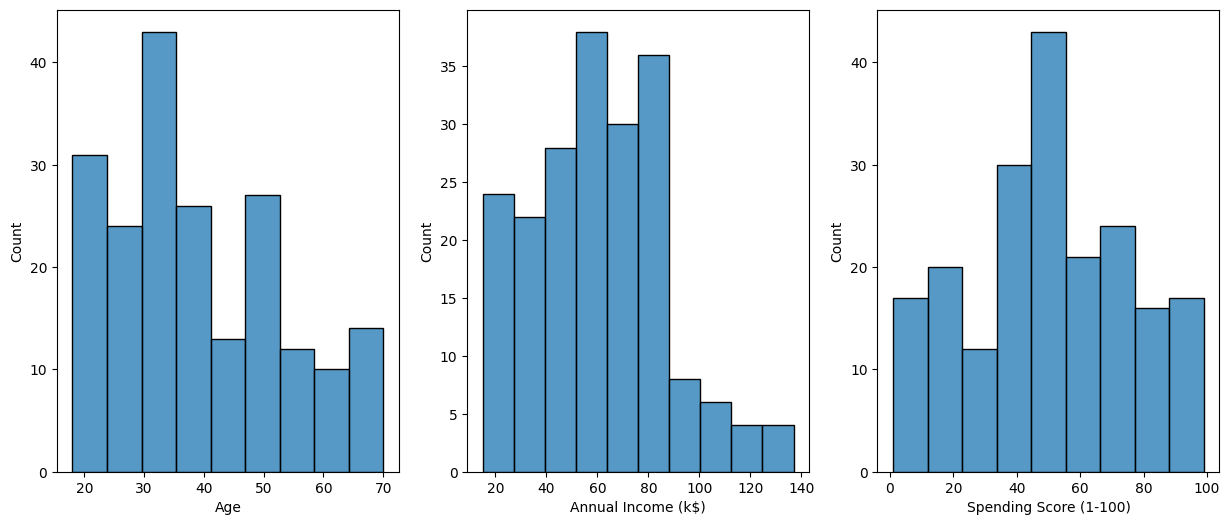

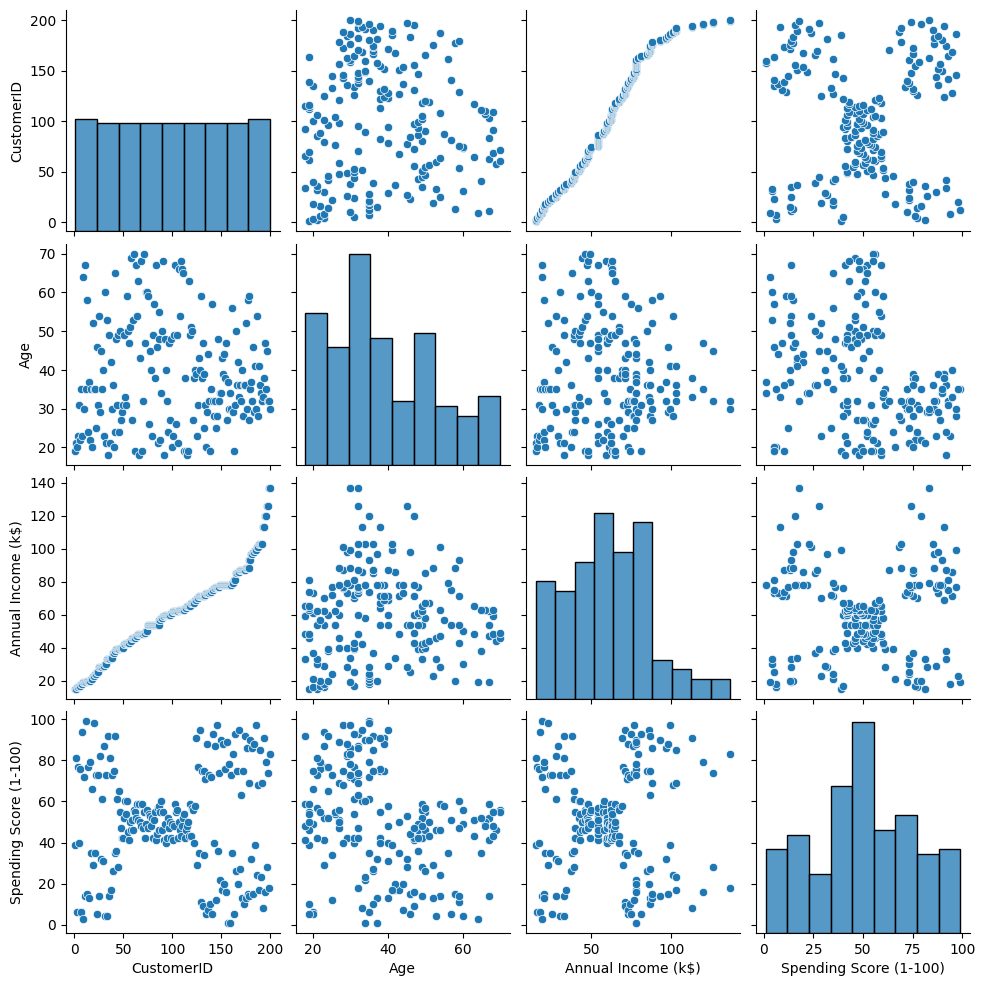

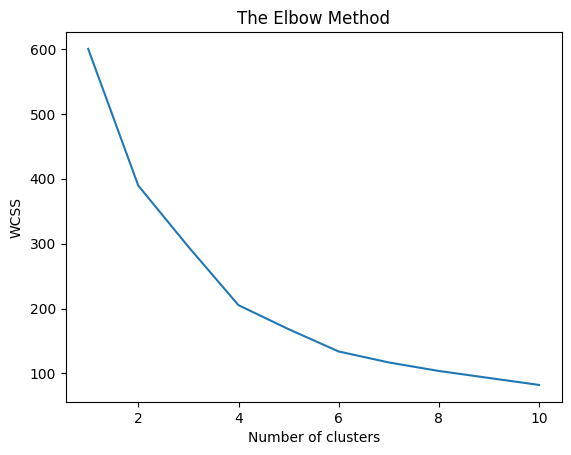

Coeficiente de Silhouette:  0.41664341513732767
Índice Calinski-Harabasz:  125.10094020060954


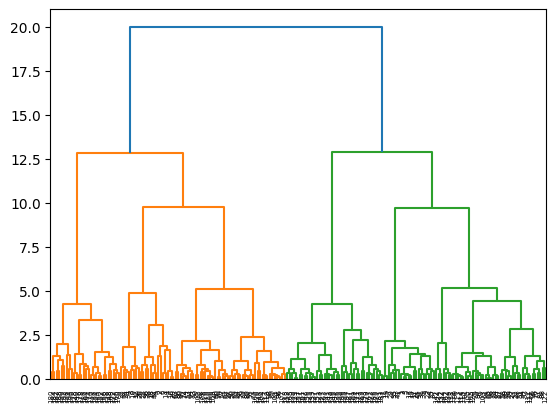

Coeficiente de Silhouette:  0.39002826186267214
Índice Calinski-Harabasz:  107.82656032570374


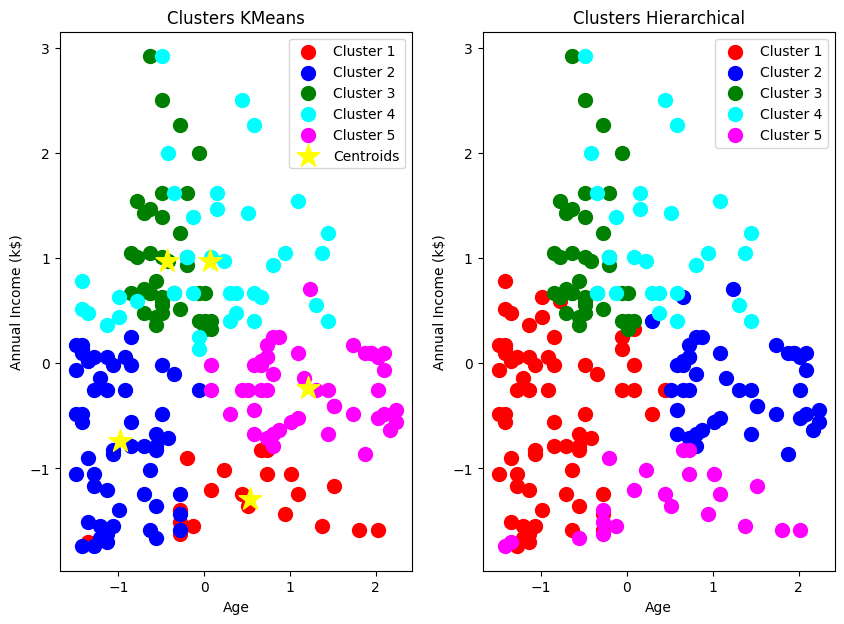

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/UNAD/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

df = pd.read_csv('Mall_Customers.csv')

# Ver primeras filas
print(df.head())

# Resumen estadístico
print(df.describe())

# Distribución de variables
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.histplot(df['Age'])
plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'])
plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'])
plt.show()

# Relaciones entre variables
sns.pairplot(df)
plt.show()

# Preprocesamiento de datos
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Selección de características
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenar Modelos y Evaluar Desempeño

# K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("Coeficiente de Silhouette: ", silhouette_score(X, y_kmeans))
print("Índice Calinski-Harabasz: ", calinski_harabasz_score(X, y_kmeans))

# Hierarchical Clustering
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print("Coeficiente de Silhouette: ", silhouette_score(X, y_hc))
print("Índice Calinski-Harabasz: ", calinski_harabasz_score(X, y_hc))

# Visualizar Resultados
# Visualizar Resultados
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', marker='*')
plt.title('Clusters KMeans')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters Hierarchical')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()